# Fraud Detection

In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder


> # Data Analysis and Preprocessing

> ## ⏳ Data Loading

In [2]:
from scripts.data_loader import load_data
credit_card_data, fraud_data, ip_address_country = load_data('docs')

> ## ✅ Check Loaded Dataset

### Credit Card Data

In [3]:
credit_card_data.tail(10)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,284797,124584,128465,197407,155467,106223,172314,16833,239378,69717,...,67577,71330,238459,193586,32792,176014,218253,206680,548,0
284798,284798,124584,150356,212429,79549,218647,126832,41361,189117,165716,...,180178,182648,233335,144575,2308,185292,228300,255053,2404,0
284799,284799,124585,31043,129066,217321,170557,241959,275165,11966,272956,...,181287,220804,25290,254948,258241,120374,265210,230749,7846,0
284800,284800,124586,254521,108685,51888,161598,143881,73953,133536,94118,...,53754,43887,241691,69098,70605,199130,62070,47649,267,0
284801,284801,124587,146887,217010,84692,79097,239179,142542,229707,164064,...,39564,33237,168777,156703,49274,179218,235215,199641,268,0
284802,284802,124588,581,275593,270,16342,836,1621,1093,275525,...,213818,151931,270386,47379,274473,207543,272884,274268,76,0
284803,284803,124589,86026,122771,260722,79680,225510,239000,134669,202380,...,214037,248406,151105,20037,28259,54217,194562,68033,2478,0
284804,284804,124590,236109,96082,5048,97736,268453,261587,95134,244929,...,218896,211936,125608,238464,189774,131236,139638,97284,6706,0
284805,284805,124590,128561,182906,180282,202324,101185,221246,54711,242910,...,227498,236791,69699,160730,31765,236451,211636,220460,999,0
284806,284806,124591,103431,107101,180358,102694,143457,84666,265094,32387,...,226477,219426,253697,127819,43639,7506,132748,141017,17621,0


### Fraud Data

In [4]:
fraud_data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


### Ip Address to Country

In [6]:
ip_address_country.head(10)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
5,16781312.0,16785407,Japan
6,16785408.0,16793599,China
7,16793600.0,16809983,Japan
8,16809984.0,16842751,Thailand
9,16842752.0,16843007,China


In [7]:
ip_address_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


> ## ⚠️ Handle Missing Values

In [8]:
from scripts.data_cleaning import find_missing_values


### Fing Missing Values Of Credit Card Data

In [9]:
find_missing_values(credit_card_data)


From 32 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,Data Type


### Fing Missing Values Of Fraud Data


In [10]:
find_missing_values(fraud_data)


From 11 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,Data Type


### Fing Missing Values Of Ip Address to Country Data


In [11]:
find_missing_values(ip_address_country)

From 3 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,Data Type


### Data Cleaning

In [12]:
fraud_data['ip_address'] = fraud_data['ip_address'].astype(int)
ip_address_country['lower_bound_ip_address'] = ip_address_country['lower_bound_ip_address'].astype(int)


> ## 📈 Exploratory Data Analysis (EDA)

>> ### Univariate analysis

#### Univariate analysis for credit card data

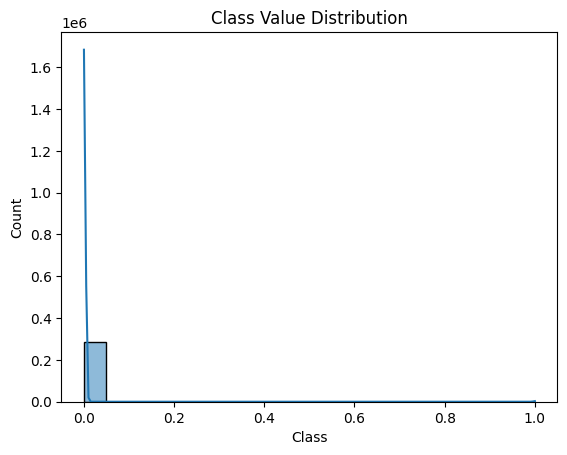

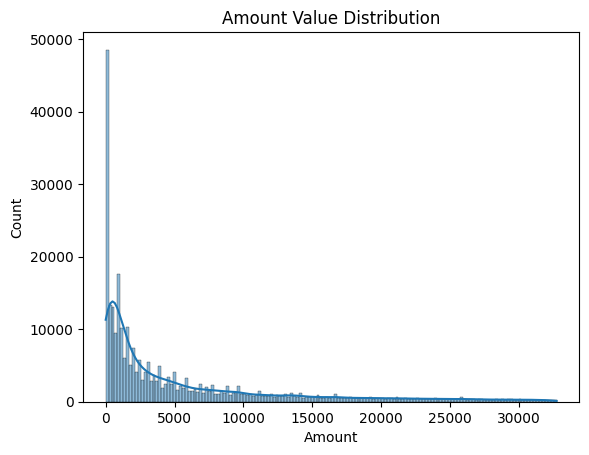

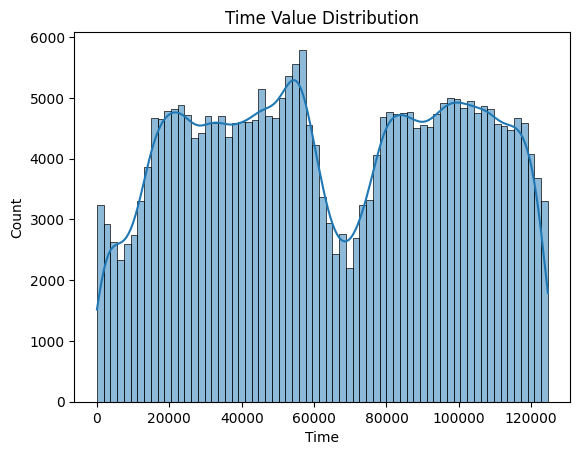

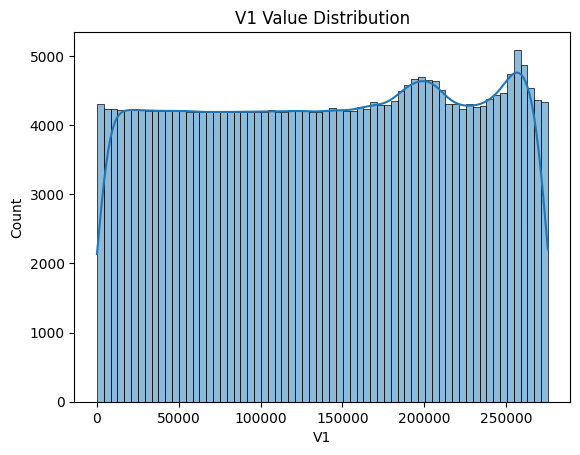

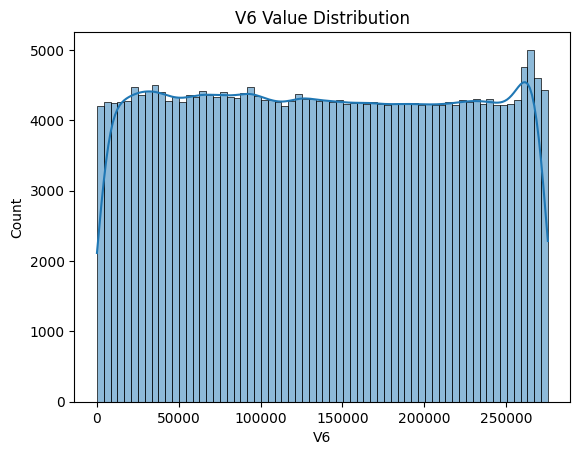

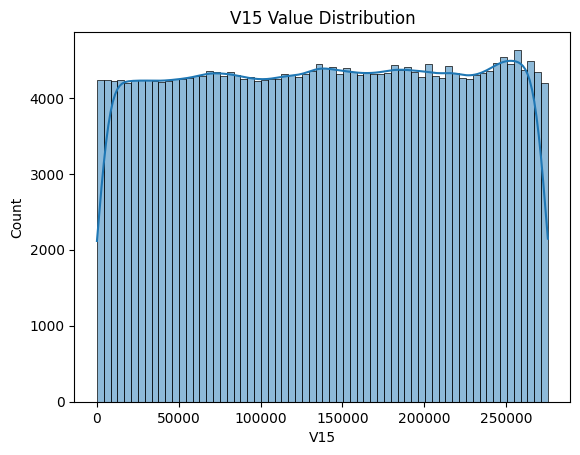

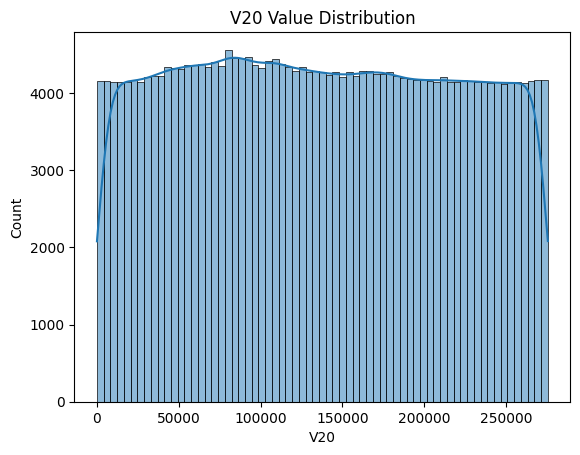

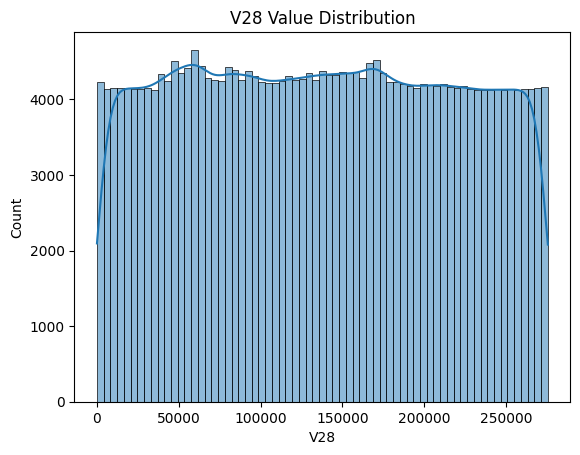

In [13]:
credit_card_data_columns = ['Class','Amount','Time','V1','V6','V15','V20','V28']
from scripts.data_cleaning import univariate_analysis
univariate_analysis(credit_card_data,credit_card_data_columns)

#### Univariate analysis for fraud data

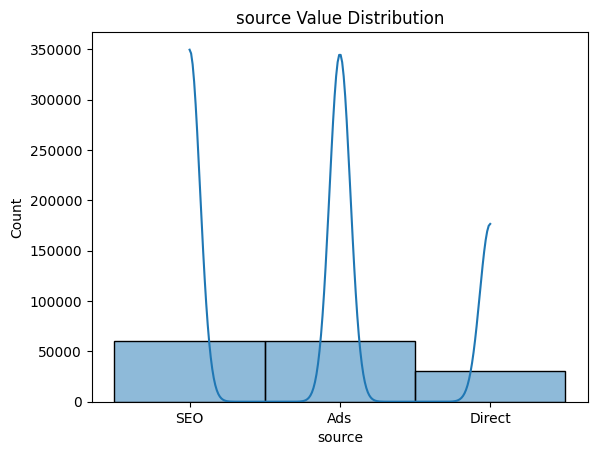

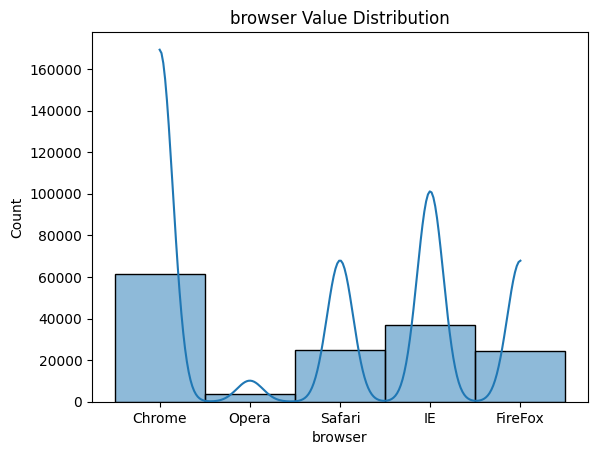

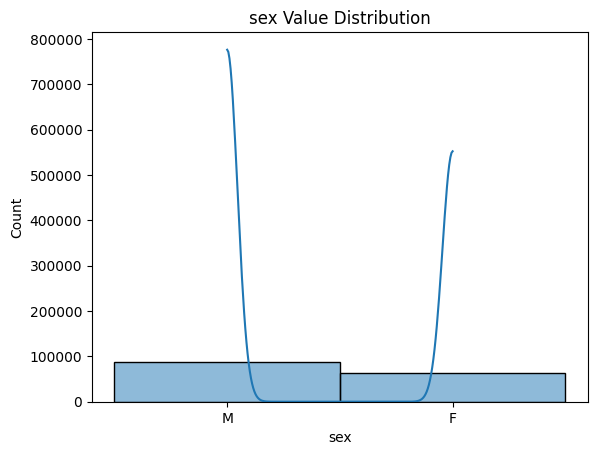

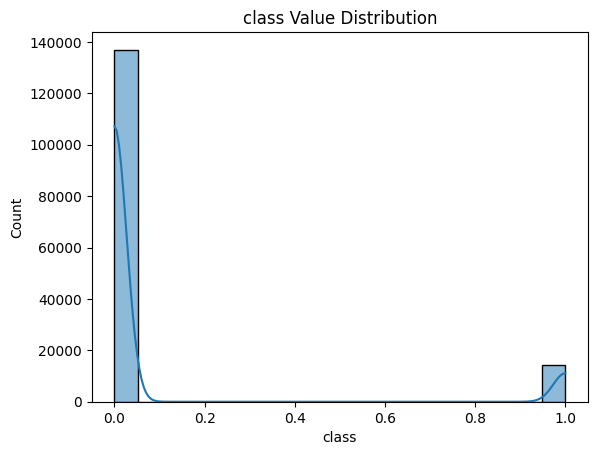

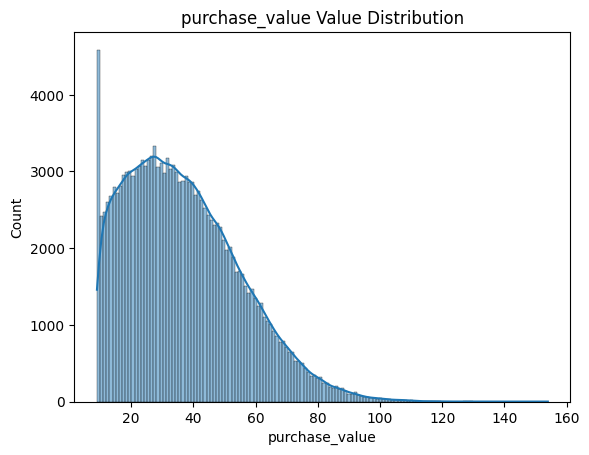

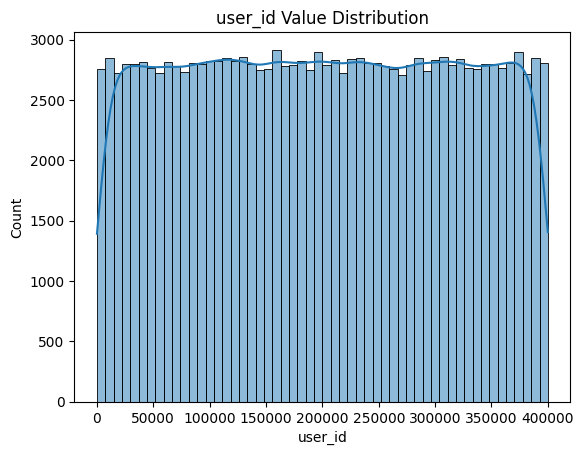

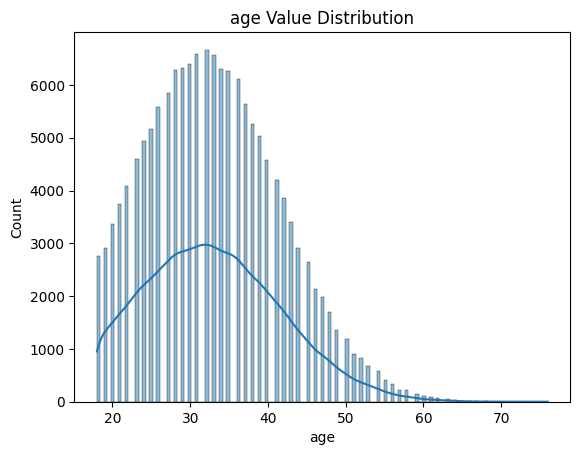

In [14]:
columns_fraud_data=['source','browser','sex','class','purchase_value','user_id','age']
univariate_analysis(fraud_data,columns_fraud_data)

### Univariate analysis of ip address to country data

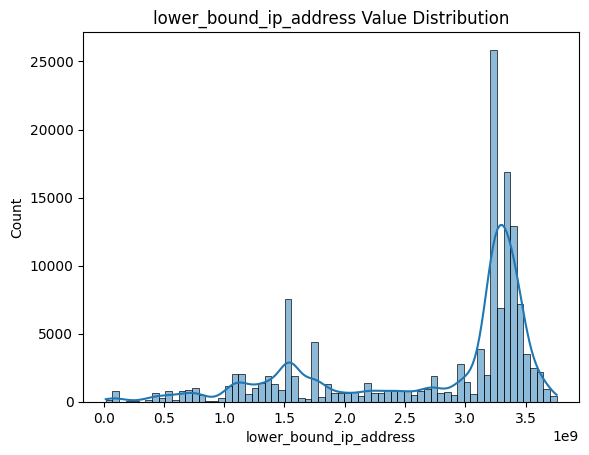

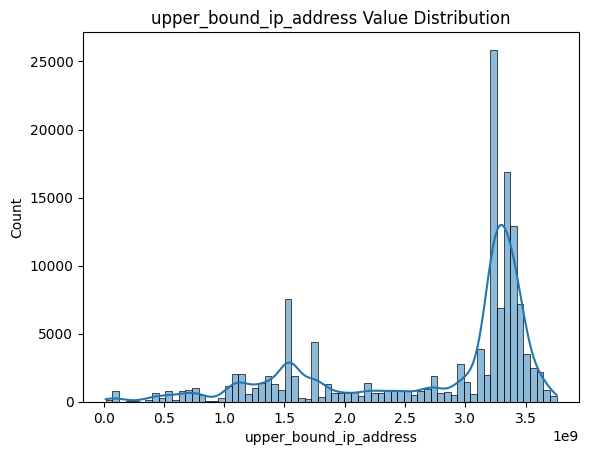

In [15]:
### Univariate analysis of ip address to country data
ip_address_country_columns = ['lower_bound_ip_address','upper_bound_ip_address']
univariate_analysis(ip_address_country,ip_address_country_columns)


>> ## Bivariate Analysis

#### Bivariate analysis of fraud data

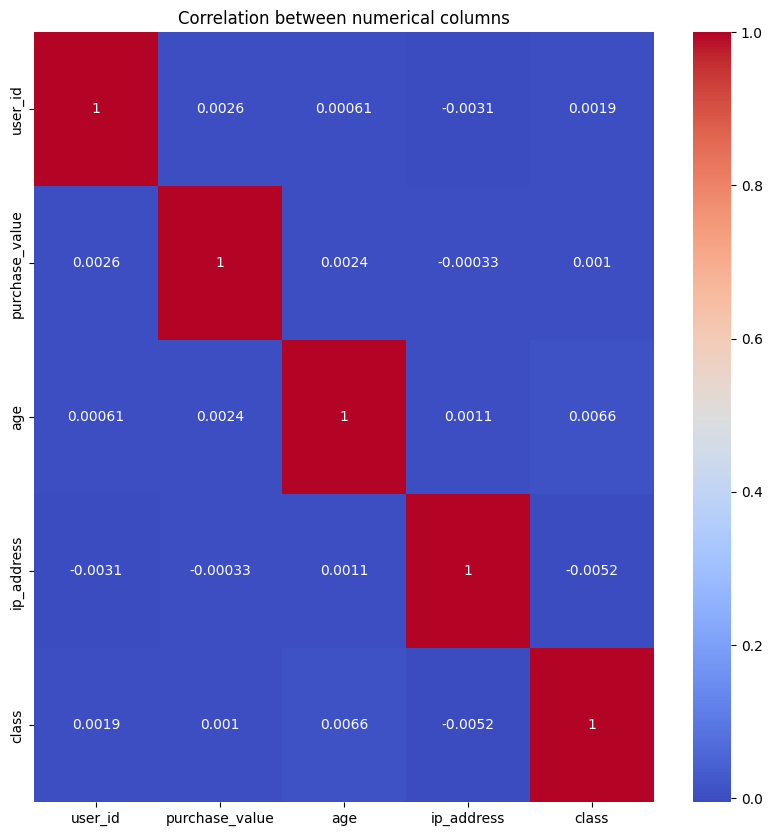

In [16]:
numerical_fraud_data= fraud_data.select_dtypes(include='number')
from scripts.data_cleaning import bivariate_analysis
bivariate_analysis(numerical_fraud_data)

#### Bivariate analysis of credit card data

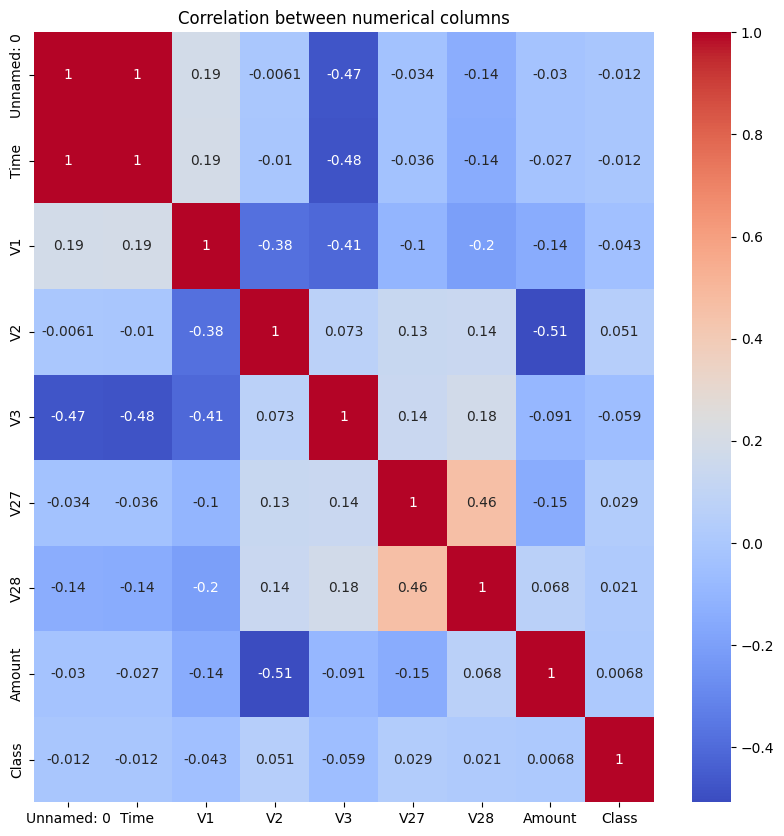

In [17]:
credit_card_data_corr = credit_card_data.drop(['V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26'], inplace=False, axis=1)
bivariate_analysis(credit_card_data_corr)

>> ## Merge Datasets for Geolocation Analysis

In [18]:
from scripts.data_cleaning import merge_fraud_ip_address_data
merged_fraud_data = merge_fraud_ip_address_data(fraud_data,ip_address_country)


In [19]:
merged_fraud_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand


In [20]:
merged_fraud_data.to_csv('docs/merged_fraud_data.csv',index=False)


In [21]:
merged_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056.0,16973823.0,Thailand


> # ✨ Feature Engineering

### Calculate Transaction Frequency and Velocity

In [22]:
merged_fraud_data['purchase_time'] = pd.to_datetime(merged_fraud_data['purchase_time'])


In [23]:
transaction_frequency = merged_fraud_data.groupby('device_id').size().reset_index(name='transaction_frequency')
merged_fraud_data = merged_fraud_data.merge(transaction_frequency, on='device_id')


In [24]:
merged_fraud_data = merged_fraud_data.sort_values(by=['user_id', 'purchase_time'])
merged_fraud_data['transaction_velocity'] = merged_fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds().fillna(0)


### Time-based features

In [25]:
merged_fraud_data['hour_of_day'] = pd.to_datetime(merged_fraud_data['purchase_time']).dt.hour
merged_fraud_data['day_of_week'] = pd.to_datetime(merged_fraud_data['purchase_time']).dt.dayofweek


In [26]:
merged_fraud_data.tail()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,transaction_frequency,transaction_velocity,hour_of_day,day_of_week
53346,399992,2015-06-04 17:43:28,2015-09-30 07:19:17,82,CNVFEDSCAWXGS,Direct,Safari,M,59,1549469282,0,1.549271e+09,1.549795e+09,France,1,0.0,7,2
94166,399993,2015-07-30 03:41:08,2015-10-01 07:16:25,20,XJMTBAKOHKTGR,Direct,IE,F,37,2755338335,0,2.755330e+09,2.755396e+09,Germany,1,0.0,7,3
127114,399995,2015-03-10 05:19:31,2015-06-05 23:36:56,33,RYXNXTOXIYRQG,Direct,FireFox,F,35,3701447303,0,3.701441e+09,3.701473e+09,Japan,1,0.0,23,4
118057,399997,2015-06-30 09:02:16,2015-10-07 20:56:54,66,XFNGDCCMMBTCB,Direct,Chrome,M,48,3454704355,0,3.454697e+09,3.454730e+09,United States,1,0.0,20,2
41156,400000,2015-03-16 23:03:56,2015-04-20 06:27:52,58,ACINFPOJYYUAW,Ads,Chrome,M,25,1217910956,1,1.217397e+09,1.218445e+09,United States,1,0.0,6,0


In [27]:
merged_fraud_data['day_of_week'].unique()

array([5, 3, 2, 4, 0, 6, 1], dtype=int32)

In [28]:
merged_fraud_data['signup_time'] = pd.to_datetime(merged_fraud_data['signup_time'])
merged_fraud_data['sex'] = merged_fraud_data['sex'].replace({'F': 0, 'M': 1})


>> ## Encode Categorical Features

In [29]:
merged_fraud_data['device_id'].value_counts()

device_id
NGQCKIADMZORL    20
KIPFSCNUGOLDP    20
ZUSVMDEZRBDTX    20
EQYVNEGOFLAWK    20
CQTUVBYIWWWBC    20
                 ..
EWVGPOPDIEXMO     1
JEROLZKDHCSOP     1
ALHRUNCTYFFLF     1
BSVLAQQRYJTJB     1
ACINFPOJYYUAW     1
Name: count, Length: 118434, dtype: int64

In [30]:
from scripts.data_cleaning import encoding_categorical_variables


In [31]:
encoded_dataframe = encoding_categorical_variables(merged_fraud_data)
encoded_dataframe.head()


,user_id,signup_time,purchase_time,purchase_value,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,device_id_encoded,source_encoded,browser_encoded,country_encoded
30049,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,0,25,880217484,0,8.724152e+08,8.891924e+08,1,0.0,10,5,23685,2,0,171
95244,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,0,38,2785906106,0,2.785542e+09,2.786066e+09,1,0.0,21,5,56090,1,4,157
11606,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,1,25,356056736,0,3.523215e+08,3.690988e+08,1,0.0,11,3,82397,2,0,171
101959,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,1,19,2985180352,0,2.985034e+09,2.985296e+09,1,0.0,20,2,57518,0,4,107
19600,16,2015-02-03 13:48:23,2015-03-12 12:46:23,9,1,32,578312545,0,5.704253e+08,5.872026e+08,1,0.0,12,3,25758,1,2,171


In [32]:
encoded_dataframe.drop(columns=['signup_time','purchase_time'],inplace=True)


In [33]:
encoded_dataframe.head()


,user_id,purchase_value,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,device_id_encoded,source_encoded,browser_encoded,country_encoded
30049,2,54,0,25,880217484,0,8.724152e+08,8.891924e+08,1,0.0,10,5,23685,2,0,171
95244,4,41,0,38,2785906106,0,2.785542e+09,2.786066e+09,1,0.0,21,5,56090,1,4,157
11606,8,47,1,25,356056736,0,3.523215e+08,3.690988e+08,1,0.0,11,3,82397,2,0,171
101959,12,35,1,19,2985180352,0,2.985034e+09,2.985296e+09,1,0.0,20,2,57518,0,4,107
19600,16,9,1,32,578312545,0,5.704253e+08,5.872026e+08,1,0.0,12,3,25758,1,2,171


In [34]:
creditCardData = pd.read_csv('./docs/creditcard.csv')
creditCardData.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,44928,120599,270851,243083,105668,211710,167150,159663,...,140442,174834,90634,147486,160454,105171,218749,102230,13502,0
1,1,0,190308,160391,134835,182525,151841,161430,120001,155852,...,68639,54299,190891,72302,168529,179871,126158,142841,268,0
2,2,1,44982,28959,251918,175559,87589,253515,227985,194133,...,223177,233865,269516,36866,68122,117706,81907,61165,23493,0
3,3,1,67135,107605,252751,68890,143700,244170,166825,214475,...,108399,136591,60398,13166,253297,96705,191339,195684,11549,0
4,4,2,55018,212082,240745,177861,97922,181139,207795,54735,...,143568,236625,79502,163439,94807,232984,235552,255032,6905,0


>> ### Normalization and Scaling

### Normalizing Fraud Data

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_fraud_data = scaler.fit_transform(encoded_dataframe)
normalized_fraud_dataframe = pd.DataFrame(normalized_fraud_data, columns=encoded_dataframe.columns)


In [36]:
normalized_fraud_dataframe.head()

,user_id,purchase_value,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,transaction_frequency,transaction_velocity,hour_of_day,day_of_week,device_id_encoded,source_encoded,browser_encoded,country_encoded
0,0.000000,0.310345,0.0,0.120690,0.230787,0.0,0.228703,0.233185,0.0,0.0,0.434783,0.833333,0.199986,1.0,0.0,0.950000
1,0.000005,0.220690,0.0,0.344828,0.740156,0.0,0.740063,0.740197,0.0,0.0,0.913043,0.833333,0.473601,0.5,1.0,0.872222
2,0.000015,0.262069,1.0,0.120690,0.090685,0.0,0.089687,0.094171,0.0,0.0,0.478261,0.500000,0.695727,1.0,0.0,0.950000
3,0.000025,0.179310,1.0,0.017241,0.793420,0.0,0.793385,0.793449,0.0,0.0,0.869565,0.333333,0.485659,0.0,1.0,0.594444
4,0.000035,0.000000,1.0,0.241379,0.150092,0.0,0.147984,0.152467,0.0,0.0,0.521739,0.500000,0.217490,0.5,0.5,0.950000


### Normalizing Credit Card Data

In [37]:
normalized_credit_card_data=scaler.fit_transform(credit_card_data)
normalized_credit_card_dataframe= pd.DataFrame(normalized_credit_card_data, columns=credit_card_data.columns)


In [38]:
normalized_credit_card_dataframe.head(10)


,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.000000,0.162982,0.437489,0.982547,0.881815,0.383325,0.768006,0.606359,0.579198,...,0.509472,0.634233,0.328787,0.535025,0.582068,0.381522,0.793541,0.370853,0.412073,0.0
1,0.000004,0.000000,0.690367,0.581839,0.489132,0.662133,0.550823,0.585608,0.435319,0.565374,...,0.248997,0.196977,0.692482,0.262285,0.611361,0.652506,0.457655,0.518174,0.008179,0.0
2,0.000007,0.000008,0.163178,0.105053,0.913866,0.636863,0.317741,0.919659,0.827045,0.704243,...,0.809604,0.848376,0.977705,0.133736,0.247121,0.426994,0.297128,0.221884,0.716993,0.0
3,0.000011,0.000008,0.243541,0.390351,0.916887,0.249907,0.521291,0.885759,0.605180,0.778036,...,0.393232,0.495502,0.219102,0.047761,0.918868,0.350810,0.694107,0.709869,0.352469,0.0
4,0.000014,0.000016,0.199585,0.769355,0.873334,0.645214,0.355225,0.657105,0.753804,0.198558,...,0.520812,0.858388,0.288404,0.592896,0.343925,0.845180,0.854496,0.925162,0.210737,0.0
5,0.000018,0.000016,0.410408,0.797310,0.774637,0.461743,0.689562,0.607265,0.705451,0.712975,...,0.270407,0.236231,0.476163,0.244096,0.323022,0.630446,0.888091,0.749385,0.011170,0.0
6,0.000021,0.000024,0.714999,0.530389,0.454161,0.846181,0.604559,0.717288,0.472357,0.561231,...,0.319420,0.365799,0.265249,0.117757,0.947671,0.317741,0.615101,0.463107,0.015199,0.0
7,0.000025,0.000032,0.340410,0.912632,0.757119,0.376856,0.834939,0.759844,0.913535,0.010876,...,0.989821,0.060937,0.623778,0.140495,0.190628,0.503406,0.010433,0.006577,0.124245,0.0
8,0.000028,0.000032,0.263225,0.589182,0.414061,0.435385,0.975035,0.978212,0.663940,0.920642,...,0.437597,0.366949,0.203546,0.979065,0.770175,0.204163,0.532504,0.852961,0.275316,0.0
9,0.000032,0.000040,0.440013,0.850201,0.748859,0.447708,0.717135,0.511764,0.777216,0.549459,...,0.222639,0.199465,0.313315,0.236384,0.445546,0.614350,0.879715,0.754228,0.011201,0.0


> ## Model Building and Training 


## Data Preparation

### Separating features and target variables:
- ‘Class’ (Credit Card dataset)
- ‘class’ (Fraud_Data dataset)
- Splitting the dataset into training and testing sets to evaluate model performance.

### For Fraud Detection

In [39]:
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
X = normalized_fraud_dataframe.drop(columns=['class'])
y = normalized_fraud_dataframe['class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled_fraud = scaler.fit_transform(X_train)
X_test_scaled_fraud = scaler.transform(X_test)

In [40]:
print(f"class 1\n{len(encoded_dataframe[encoded_dataframe['class']==1])}\n")
print(f"class 0\n{len(encoded_dataframe[encoded_dataframe['class']==0])}\n")

class 1
12268

class 0
116878



### For Credit Card

In [41]:
X = normalized_credit_card_dataframe.drop(columns=['Class'])
y = normalized_credit_card_dataframe['Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled_credit = scaler.fit_transform(X_train)
X_test_scaled_credit = scaler.transform(X_test)


> # Model Selection

## Traditional Models: 
    - Logistic Regression, 
    - Decision Tree, 
    - Random Forest, 
    - Gradient Boosting.

## Neural Networks: 
    - MLP, 
    - CNN, 
    - RNN, 
    - LSTM (with appropriate data reshaping).
## MLOps Integration
- MLflow Tracking: Log parameters, metrics, and models for each experiment.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM
import mlflow
import mlflow.sklearn
import mlflow.keras

In [43]:
mlflow.sklearn.autolog()

In [44]:
    # Scale data for models requiring it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
    # Reshape for neural networks
n_features = X_train_scaled.shape[1]
X_train_cnn = X_train_scaled.reshape(-1, n_features, 1)
X_test_cnn = X_test_scaled.reshape(-1, n_features, 1)
X_train_rnn = X_train_scaled.reshape(-1, 1, n_features)
X_test_rnn = X_test_scaled.reshape(-1, 1, n_features)

In [46]:
   # Class weights for imbalance
import numpy as np
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

In [47]:
# mlflow server --host 127.0.0.1 --port 5050
mlflow.set_tracking_uri("http://127.0.0.1:5050")


In [48]:
#     # Traditional Models
# traditional_models = [
#         ('Logistic Regression', LogisticRegression(class_weight='balanced'), True),
#         ('Decision Tree', DecisionTreeClassifier(), False),
#         ('Random Forest', RandomForestClassifier(), False),
#         ('Gradient Boosting', GradientBoostingClassifier(), False)
#     ]
# for model_name, model, use_scaled in traditional_models:
#         with mlflow.start_run():
#             # mlflow.set_tag("dataset", dataset_name)
#             mlflow.set_tag("model", model_name)
            
#             if use_scaled:
#                 X_tr, X_te = X_train_scaled, X_test_scaled
#             else:
#                 X_tr, X_te = X_train.values, X_test.values
            
#             model.fit(X_tr, y_train)
#             y_pred = model.predict(X_te)
   


In [49]:
import mlflow
import mlflow.sklearn
import pickle

# Define a function to train, evaluate, log, and save a model
def train_evaluate_log_save(model_name, model, X_train, y_train, X_test, y_test, use_scaled):
    with mlflow.start_run():
        mlflow.set_tag("model", model_name)
        
        # Use scaled data if specified
        X_tr, X_te = (X_train_scaled, X_test_scaled) if use_scaled else (X_train, X_test)
        
        # Train the model
        model.fit(X_tr, y_train)
        y_pred = model.predict(X_te)
        
        # Calculate evaluation metrics
        metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_pred)
        }
        
        # Log metrics to MLflow
        mlflow.log_metrics(metrics)
        
        # Print metrics
        print(f"Model: {model_name}")
        for metric_name, metric_value in metrics.items():
            print(f"{metric_name.capitalize()}: {metric_value:.4f}")
        print("-" * 30)
        
        # Log the model to MLflow
        mlflow.sklearn.log_model(model, model_name)
        
        # Save the model locally using pickle
        with open(f'{model_name.replace(" ", "_").lower()}.pkl', 'wb') as f:
            pickle.dump(model, f)

# Initialize your models
traditional_models = [
    ('Logistic Regression', LogisticRegression(class_weight='balanced'), True),
    ('Decision Tree', DecisionTreeClassifier(), False),
    ('Random Forest', RandomForestClassifier(), False),
    ('Gradient Boosting', GradientBoostingClassifier(), False)
]

# Assuming X_train, X_test, X_train_scaled, X_test_scaled, y_train, and y_test are already defined
for model_name, model, use_scaled in traditional_models:
    train_evaluate_log_save(model_name, model, X_train, y_train, X_test, y_test, use_scaled)


2025/02/14 11:13:18 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Model: Logistic Regression
Accuracy: 0.9656
Precision: 0.0446
Recall: 0.9286
F1: 0.0851
Roc_auc: 0.9471
------------------------------


2025/02/14 11:13:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run nimble-rook-954 at: http://127.0.0.1:5050/#/experiments/0/runs/b90676af6ef646e692daf92df9bdfb0c
🧪 View experiment at: http://127.0.0.1:5050/#/experiments/0
Model: Decision Tree
Accuracy: 0.9991
Precision: 0.7009
Recall: 0.8367
F1: 0.7628
Roc_auc: 0.9181
------------------------------


2025/02/14 11:14:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run mysterious-squid-863 at: http://127.0.0.1:5050/#/experiments/0/runs/8201f1138ff5404d9e7983b7db297618
🧪 View experiment at: http://127.0.0.1:5050/#/experiments/0
Model: Random Forest
Accuracy: 0.9996
Precision: 0.9744
Recall: 0.7755
F1: 0.8636
Roc_auc: 0.8877
------------------------------


2025/02/14 11:18:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run resilient-carp-868 at: http://127.0.0.1:5050/#/experiments/0/runs/94ba510d07384eef9b2015e93ddb2bdf
🧪 View experiment at: http://127.0.0.1:5050/#/experiments/0
Model: Gradient Boosting
Accuracy: 0.9989
Precision: 0.7375
Recall: 0.6020
F1: 0.6629
Roc_auc: 0.8008
------------------------------


2025/02/14 11:26:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run industrious-cod-383 at: http://127.0.0.1:5050/#/experiments/0/runs/4a4cdc0fd8704760a100200284fed316
🧪 View experiment at: http://127.0.0.1:5050/#/experiments/0


In [50]:
mlflow.end_run()

In [51]:
import mlflow
import mlflow.keras
import pickle
import numpy as np

# Define a function to build the model based on the type
def build_model(model_type, input_shape):
    model = Sequential()
    if model_type == 'cnn':
        model.add(Conv1D(32, 3, activation='relu', input_shape=input_shape))
        model.add(MaxPooling1D(2))
        model.add(Flatten())
    elif model_type == 'rnn':
        model.add(SimpleRNN(64, input_shape=input_shape))
    elif model_type == 'lstm':
        model.add(LSTM(64, input_shape=input_shape))
    else:  # MLP
        model.add(Dense(64, activation='relu', input_shape=(input_shape[0],)))
        model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a function to train, evaluate, log, and save a model
def train_evaluate_log_save(model_name, X_train, y_train, X_test, y_test, model_type=None, class_weights=None):
    with mlflow.start_run():
        mlflow.set_tag("model", model_name)
        
        # Determine input shape
        if model_type in ['cnn', 'rnn', 'lstm']:
            input_shape = (X_train.shape[1], X_train.shape[2])
        else:
            input_shape = (X_train.shape[1],)
        
        # Build and train the model
        model = build_model(model_type, input_shape)
        model.fit(
            X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_split=0.2,
            class_weight=class_weights,
            verbose=0
        )
        
        # Evaluate the model
        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()
        
        # Calculate evaluation metrics
        metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_pred_prob)
        }
        
        # Log metrics to MLflow
        mlflow.log_metrics(metrics)
        
        # Print metrics
        print(f"Model: {model_name}")
        for metric_name, metric_value in metrics.items():
            print(f"{metric_name.capitalize()}: {metric_value:.4f}")
        print("-" * 30)
        
        # Log the model to MLflow
        mlflow.keras.log_model(model, model_name)
        
        # Save the model locally using Keras's built-in save method
        model.save(f'{model_name.replace(" ", "_").lower()}.h5')

# Assuming X_train_scaled, X_test_scaled, X_train_cnn, X_test_cnn, X_train_rnn, X_test_rnn, y_train, y_test, and class_weights are already defined
nn_models = [
    ('MLP', X_train_scaled, X_test_scaled, None),
    ('CNN', X_train_cnn, X_test_cnn, 'cnn'),
    ('RNN', X_train_rnn, X_test_rnn, 'rnn'),
    ('LSTM', X_train_rnn, X_test_rnn, 'lstm')
]

for model_name, X_tr, X_te, model_type in nn_models:
    train_evaluate_log_save(model_name, X_tr, y_train, X_te, y_test, model_type, class_weights)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


2025/02/14 11:27:55 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Model: MLP
Accuracy: 0.9726
Precision: 0.0536
Recall: 0.8980
F1: 0.1012
Roc_auc: 0.9810
------------------------------


2025/02/14 11:28:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run nosy-whale-819 at: http://127.0.0.1:5050/#/experiments/0/runs/7e8ba741689a4267a69d44124a085e89
🧪 View experiment at: http://127.0.0.1:5050/#/experiments/0
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


2025/02/14 11:31:39 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Model: CNN
Accuracy: 0.9595
Precision: 0.0388
Recall: 0.9490
F1: 0.0745
Roc_auc: 0.9827
------------------------------


2025/02/14 11:31:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run traveling-fly-254 at: http://127.0.0.1:5050/#/experiments/0/runs/8f9e609eda0b470487dbe4d0679fef63
🧪 View experiment at: http://127.0.0.1:5050/#/experiments/0
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step


2025/02/14 11:33:51 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Model: RNN
Accuracy: 0.9766
Precision: 0.0618
Recall: 0.8878
F1: 0.1155
Roc_auc: 0.9774
------------------------------


2025/02/14 11:33:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run unleashed-bass-670 at: http://127.0.0.1:5050/#/experiments/0/runs/587ae481112c43ebbe613b2637aa3d0c
🧪 View experiment at: http://127.0.0.1:5050/#/experiments/0
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step   


2025/02/14 11:35:54 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Model: LSTM
Accuracy: 0.9905
Precision: 0.1401
Recall: 0.8776
F1: 0.2416
Roc_auc: 0.9818
------------------------------


2025/02/14 11:36:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run flawless-bird-334 at: http://127.0.0.1:5050/#/experiments/0/runs/8904c873bc2c4ab9be0152c6092a1719
🧪 View experiment at: http://127.0.0.1:5050/#/experiments/0


> ## Model Explainability

- Model explainability is crucial for understanding, trust, and debugging in machine learning models. You will use SHAP (Shapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) to interpret the models you built for fraud detection.

SHAP 
- sharp provide a unified measure of feature importance, explaining the contribution of each feature to the prediction.

2025/02/14 11:36:04 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Explaining Logistic Regression with SHAP


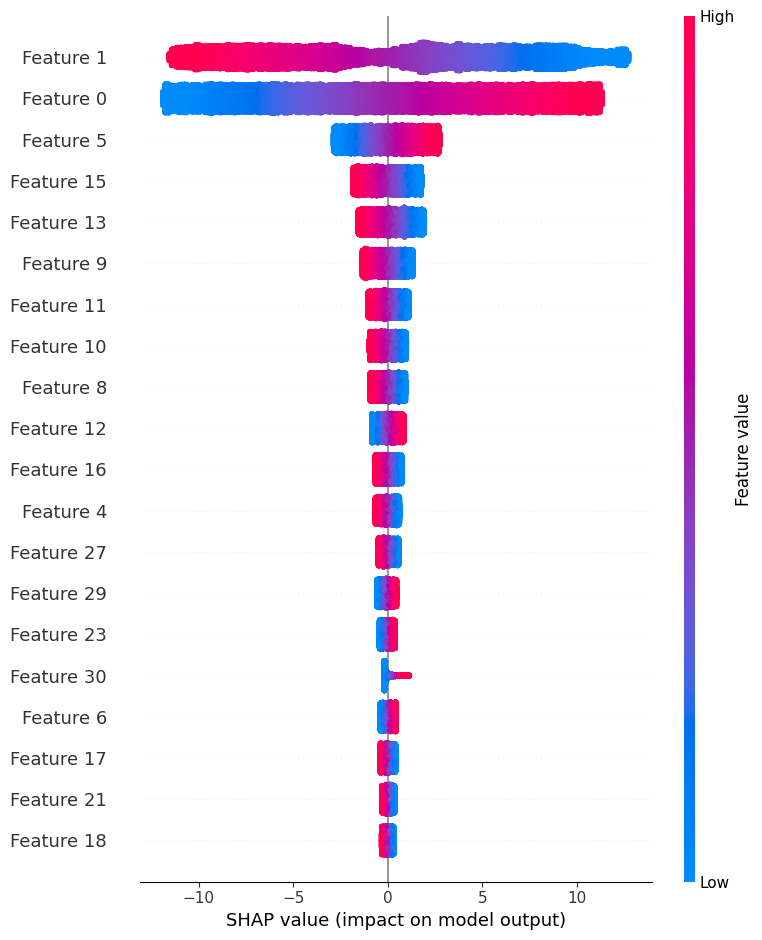

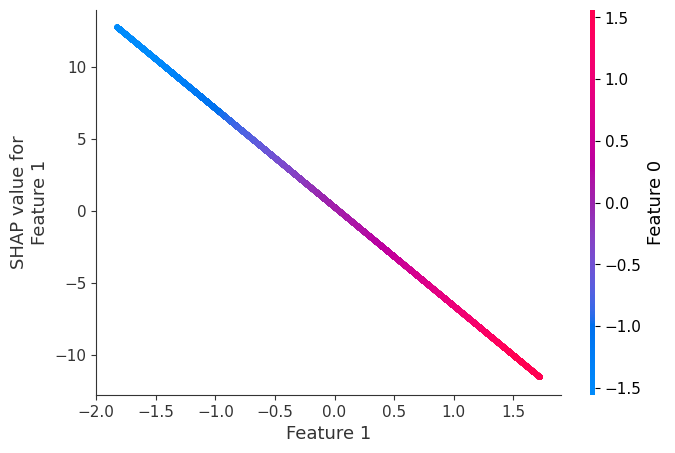

2025/02/14 11:36:19 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


🏃 View run masked-bear-354 at: http://127.0.0.1:5050/#/experiments/0/runs/2de8d9316ae34eae8f1fbc0c1159fcc8
🧪 View experiment at: http://127.0.0.1:5050/#/experiments/0
Explaining Decision Tree with SHAP


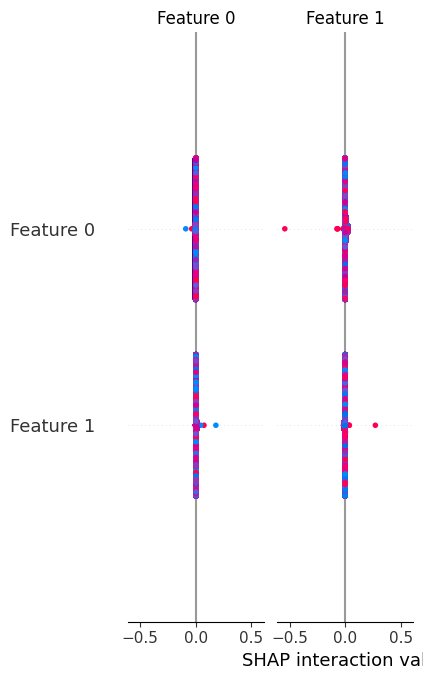

🏃 View run welcoming-smelt-90 at: http://127.0.0.1:5050/#/experiments/0/runs/9933419b564a4153aea3e1f55fc30c70
🧪 View experiment at: http://127.0.0.1:5050/#/experiments/0


IndexError: index 42 is out of bounds for axis 0 with size 31

In [52]:
import shap
# Ensure SHAP works properly in Jupyter
shap.initjs()

# SHAP Explainability Function
def explain_model(model, X_test, model_name):
    print(f"Explaining {model_name} with SHAP")
    
    # Convert X_test to DataFrame if it's a NumPy array
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test, columns=[f"Feature {i}" for i in range(X_test.shape[1])])
    
    # Use appropriate SHAP explainer
    if isinstance(model, (RandomForestClassifier, GradientBoostingClassifier, DecisionTreeClassifier)):
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    elif isinstance(model, LogisticRegression):
        explainer = shap.LinearExplainer(model, X_test)
        shap_values = explainer.shap_values(X_test)
    else:
        print(f"SHAP not supported for {model_name}")
        return
    
    # Summary Plot
    shap.summary_plot(shap_values, X_test)
    plt.show()
    
    # Dependence Plot (for top feature)
    top_feature = X_test.columns[abs(shap_values).mean(axis=0).argmax()]
    shap.dependence_plot(top_feature, shap_values, X_test)
    plt.show()
    
    # Force Plot for a specific instance (e.g., the first instance)
    instance_idx = 0  # Change this index to visualize a different instance
    shap.initjs()
    
    # Check if shap_values is a list (multi-output model)
    if isinstance(shap_values, list):
        # For multi-output models, shap_values is a list of arrays
        for i, shap_value in enumerate(shap_values):
            print(f"Force plot for output {i}:")
            shap.force_plot(explainer.expected_value[i], shap_value[instance_idx], X_test.iloc[instance_idx])
            plt.show()
    else:
        # For single-output models, shap_values is a single array
        shap.force_plot(explainer.expected_value, shap_values[instance_idx], X_test.iloc[instance_idx])
        plt.show()

# Train and Explain Models
for model_name, model, use_scaled in traditional_models:
    with mlflow.start_run():
        mlflow.set_tag("model", model_name)
        
        X_tr, X_te = (X_train_scaled, X_test_scaled) if use_scaled else (X_train.values, X_test.values)
        
        model.fit(X_tr, y_train)
        y_pred = model.predict(X_te)
        
        # Explain model using SHAP
        explain_model(model, X_te, model_name)


## LIME (Local Interpretable Model-agnostic Explanations)

 - A technique that explains individual predictions by approximating the model locally with an interpretable model. It is particularly useful for understanding the decisions of complex, black-box models.

In [ ]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=[str(i) for i in range(len(model.classes_))],
    mode='classification'
)

# Select an instance to explain (e.g., the first instance in X_test)
instance_idx = 0  # Change this index to visualize a different instance
instance = X_test.iloc[instance_idx]

# Explain the instance
explanation = explainer.explain_instance(
    instance.values,
    model.predict_proba
)

# Display the explanation
explanation.show_in_notebook()


2025/02/11 16:27:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b3569017ad734ce383359e78eb9f6e36', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/02/11 16:28:03 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'faf877a435ac4c0db566a51f037bcec2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run bold-roo-855 at: http://127.0.0.1:5000/#/experiments/0/runs/b3569017ad734ce383359e78eb9f6e36
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0
🏃 View run sedate-doe-244 at: http://127.0.0.1:5000/#/experiments/0/runs/faf877a435ac4c0db566a51f037bcec2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0


LIME Plots:

LIME provides various plots to visualize the explanations:
- Feature Importance Plot: Shows the most influential features for a specific prediction.

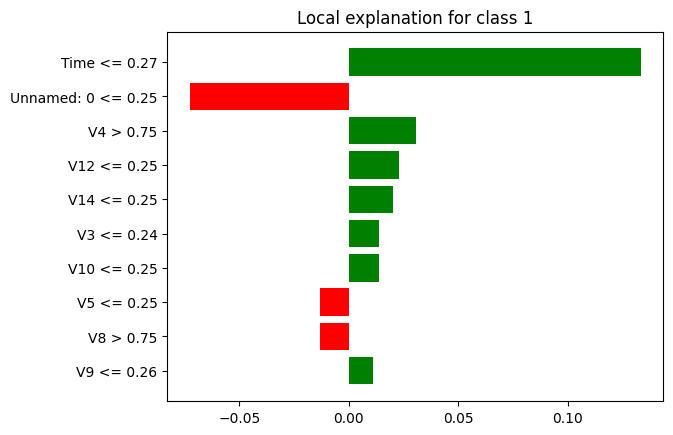

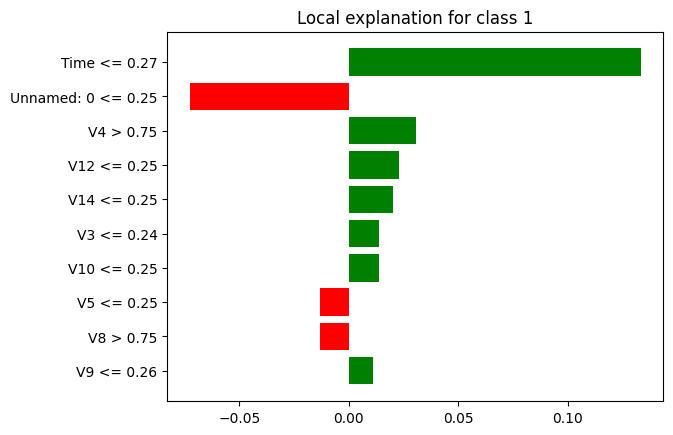

In [ ]:
explanation.as_pyplot_figure()


- Decision Boundary Plot: Visualizes the decision boundary of the model along with the explained instance.

In [ ]:
explanation.as_map()


{1: [(np.int64(1), np.float64(0.1334121587371307)),
  (np.int64(0), np.float64(-0.07262367500835411)),
  (np.int64(5), np.float64(0.0306525968754736)),
  (np.int64(13), np.float64(0.022832300262307495)),
  (np.int64(15), np.float64(0.020431522789395144)),
  (np.int64(4), np.float64(0.013840827685745781)),
  (np.int64(11), np.float64(0.01378110913680886)),
  (np.int64(6), np.float64(-0.013315925001155162)),
  (np.int64(9), np.float64(-0.01301455704438309)),
  (np.int64(10), np.float64(0.01089794089197292))]}

> ## Model Deployment and API Development

Deploy the model as an API using Flask, Dockerize the application, and integrate logging for monitoring